In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import plotly.express as px

In [2]:
df = pd.read_csv('android-games.csv')
df.head(12)

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
0,1,Garena Free Fire - The Cobra,80678661,500.0 M,4.33,2.9,7.9,0.0,GAME ACTION,61935712,4478738,2795172,1814999,9654037,False
1,2,PUBG MOBILE: Graffiti Prank,35971961,100.0 M,4.24,2.0,3.1,0.0,GAME ACTION,26670566,2109631,1352610,893674,4945478,False
2,3,Mobile Legends: Bang Bang,25836869,100.0 M,4.08,1.6,3.3,0.0,GAME ACTION,17850942,1796761,1066095,725429,4397640,False
3,4,Brawl Stars,17181659,100.0 M,4.27,4.1,6.6,0.0,GAME ACTION,12493668,1474319,741410,383478,2088781,False
4,5,Sniper 3D: Fun Free Online FPS Shooting Game,14237554,100.0 M,4.33,0.8,1.8,0.0,GAME ACTION,9657878,2124544,1034025,375159,1045945,False
5,6,Shadow Fight 2,14048931,100.0 M,4.57,0.6,1.5,0.0,GAME ACTION,11532143,961926,448184,217044,889631,False
6,7,Call of Duty®: Mobile - Day of Reckoning,13020115,100.0 M,4.47,2.8,5.1,0.0,GAME ACTION,10079925,1210326,488294,261610,979958,False
7,8,Among Us,11298789,100.0 M,3.65,6.3,12.3,0.0,GAME ACTION,6173970,1026476,770574,614021,2713745,False
8,9,Temple Run 2,9554877,500.0 M,4.21,0.3,0.6,0.0,GAME ACTION,6521348,996144,615544,343978,1077860,False
9,10,PUBG MOBILE LITE,7392911,100.0 M,4.16,1.3,2.9,0.0,GAME ACTION,5231571,494013,343880,232468,1090976,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              1730 non-null   int64  
 1   title             1730 non-null   object 
 2   total ratings     1730 non-null   int64  
 3   installs          1730 non-null   object 
 4   average rating    1730 non-null   float64
 5   growth (30 days)  1730 non-null   float64
 6   growth (60 days)  1730 non-null   float64
 7   price             1730 non-null   float64
 8   category          1730 non-null   object 
 9   5 star ratings    1730 non-null   int64  
 10  4 star ratings    1730 non-null   int64  
 11  3 star ratings    1730 non-null   int64  
 12  2 star ratings    1730 non-null   int64  
 13  1 star ratings    1730 non-null   int64  
 14  paid              1730 non-null   bool   
dtypes: bool(1), float64(4), int64(7), object(3)
memory usage: 191.0+ KB


In [4]:
df.describe()

,rank,total ratings,average rating,growth (30 days),growth (60 days),price,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings
count,1730.000000,1.730000e+03,1730.000000,1730.000000,1730.000000,1730.000000,1.730000e+03,1.730000e+03,1.730000e+03,1.730000e+03,1.730000e+03
mean,50.475723,1.101182e+06,4.313410,193.167341,3.969249,0.012965,7.883837e+05,1.216466e+05,5.954986e+04,2.796247e+04,1.036364e+05
std,28.941630,3.311738e+06,0.253545,4775.617650,18.912904,0.243492,2.483061e+06,2.955701e+05,1.447400e+05,7.676625e+04,3.589869e+05
min,1.000000,3.823800e+04,3.090000,0.000000,0.000000,0.000000,2.189800e+04,2.441000e+03,7.070000e+02,2.880000e+02,5.270000e+02
25%,25.000000,1.879988e+05,4.180000,0.100000,0.300000,0.000000,1.358290e+05,2.180200e+04,1.027775e+04,4.529500e+03,1.356075e+04
50%,51.000000,4.576750e+05,4.330000,0.500000,1.000000,0.000000,3.109435e+05,5.464350e+04,2.665850e+04,1.133050e+04,3.569400e+04
75%,75.750000,9.443342e+05,4.490000,1.600000,3.300000,0.000000,6.511310e+05,1.095648e+05,5.581750e+04,2.526650e+04,8.632625e+04
max,100.000000,8.067866e+07,4.910000,140394.400000,605.100000,7.490000,6.193571e+07,5.397273e+06,2.795172e+06,1.814999e+06,9.654037e+06


In [5]:
# skontrolujeme, či v dátovom rámci chýbajú nejaké údaje
df.isnull().sum() 

rank                0
title               0
total ratings       0
installs            0
average rating      0
growth (30 days)    0
growth (60 days)    0
price               0
category            0
5 star ratings      0
4 star ratings      0
3 star ratings      0
2 star ratings      0
1 star ratings      0
paid                0
dtype: int64

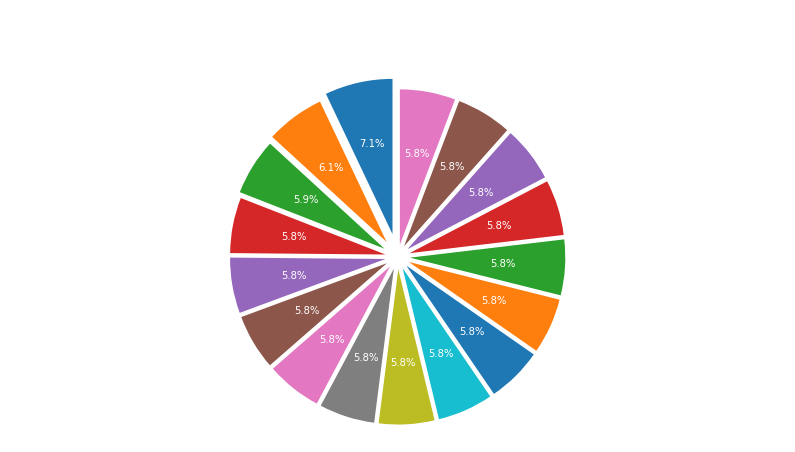

In [6]:
plt.figure(figsize=(14, 7))
labels=df['category'].value_counts().index
plt.pie(df['category'].value_counts().values,labels=labels,
        explode=[0.15, 0.12, 0.1, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08],
        autopct='%1.1f%%', startangle=90,
        textprops={'color':"w"})
plt.title('Category Pie Chart', color='White', fontsize=20,pad=40)
plt.axis('equal')
plt.show()

In [7]:
def Paid(paid):
    if paid  == 0 : return 'Free'
    else: return 'Costs'
df['paid'] = df.apply(lambda x: Paid(x["paid"]), axis = 1)

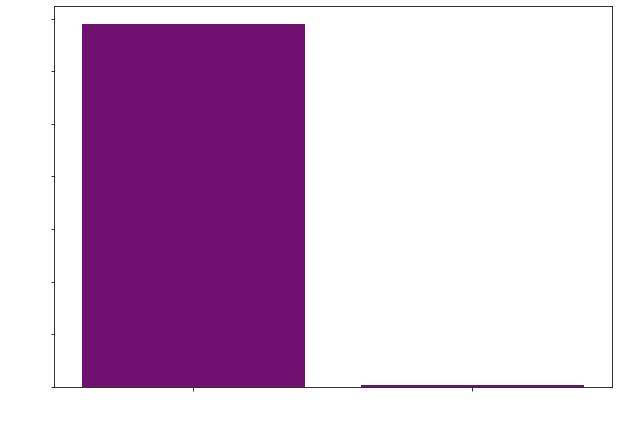

In [8]:
plt.figure(figsize = (10, 7))
ax = sns.countplot(x = "paid", data=df, color=('purple'))
plt.yticks(color='white')
plt.xticks(color='white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')

In [9]:
df['paid'].value_counts()

Free     1723
Costs       7
Name: paid, dtype: int64

In [10]:
df['installs'].value_counts()

10.0 M      795
50.0 M      266
5.0 M       248
100.0 M     203
1.0 M       191
500.0 k      13
500.0 M      10
1000.0 M      2
100.0 k       2
Name: installs, dtype: int64

In [11]:
def get_installs(value):
    if value[-1] == 'M':
        return float(value[:-2])
    elif value[-1] == 'k':
        return (float(value[:-2]) / 1000)
    
df['installs'] = df['installs'].apply(get_installs)
df['installs'].value_counts()

10.0      795
50.0      266
5.0       248
100.0     203
1.0       191
0.5        13
500.0      10
0.1         2
1000.0      2
Name: installs, dtype: int64

,installs
category,
GAME ARCADE,6931.0
GAME CASUAL,6847.0
GAME ACTION,6650.0
GAME RACING,4640.0
GAME PUZZLE,3631.0
GAME SPORTS,3491.0
GAME SIMULATION,2871.0
GAME STRATEGY,2392.0
GAME BOARD,2038.0


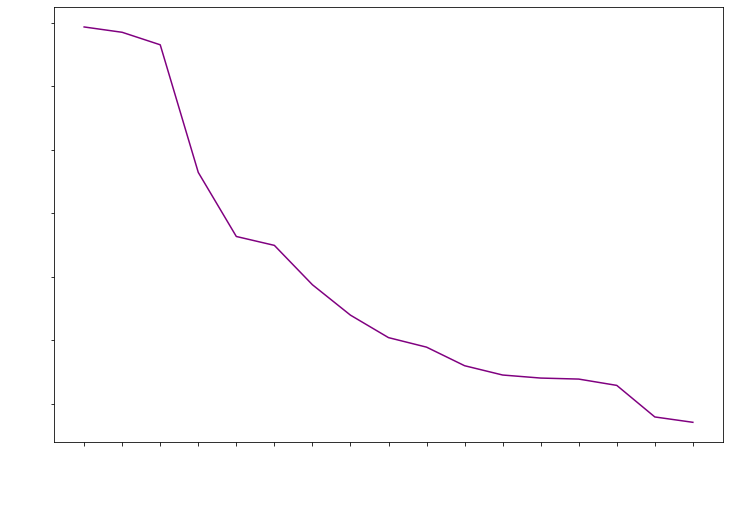

In [12]:
total_installs = df.groupby(['category']).sum()[['installs']]\
.sort_values(by='installs', ascending=False)

fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(x='category', y='installs', color='purple', data=total_installs)
plt.yticks(color='white')
plt.xticks(rotation=-30, color='white');
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')

total_installs

In [13]:
rating_columns = ['5 star ratings', '4 star ratings', '3 star ratings',
                  '2 star ratings', '1 star ratings']

rating_perc = df.groupby('category')[rating_columns].sum()\
.apply(lambda x: x/x.sum(), axis=1)\
.sort_values(by='5 star ratings', ascending=False)

rating_and_install = rating_perc.merge(total_installs, left_index=True, right_index=True)
rating_and_install

,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,installs
category,,,,,,
GAME CASINO,0.740402,0.111406,0.050221,0.020915,0.077056,788.5
GAME CASUAL,0.725871,0.115073,0.053982,0.023951,0.081123,6847.0
GAME ARCADE,0.722223,0.105012,0.056522,0.026644,0.089599,6931.0
GAME PUZZLE,0.719794,0.130283,0.059329,0.023932,0.066661,3631.0
GAME ACTION,0.719571,0.086885,0.047999,0.026561,0.118984,6650.0
GAME WORD,0.719357,0.149105,0.057365,0.021055,0.053118,1385.0
GAME RACING,0.719216,0.102845,0.055118,0.027209,0.095614,4640.0
GAME BOARD,0.719082,0.109629,0.049232,0.023135,0.098923,2038.0
GAME STRATEGY,0.716916,0.114891,0.052746,0.022715,0.092733,2392.0


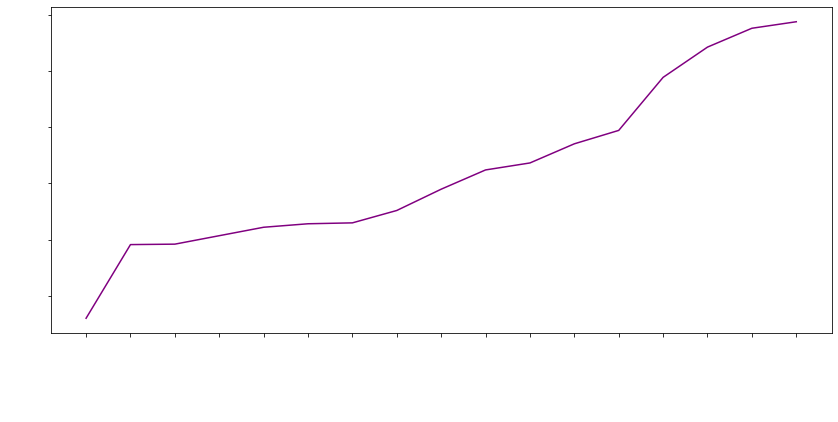

In [14]:
fig, ax = plt.subplots(figsize=(14,6))

avg_rating = df.groupby('category')['average rating'].mean().sort_values()
avg_rating.plot(color='purple')
plt.xticks(ticks=np.arange(17), labels=list(avg_rating.index), color='white', rotation=-30)
plt.yticks(color='white')
plt.xlabel('Game Categories', color='white')
plt.ylabel('Average Ratings', color='white');

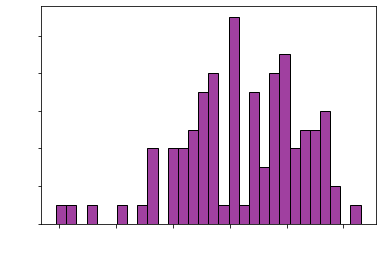

In [15]:
action_ratings = df[df['category'] == 'GAME ACTION']

sns.histplot(x='average rating', color='purple', data=action_ratings, bins=30);
plt.xticks(color='white')
plt.yticks(color='white')
plt.xlabel('Average rating', color='white')
plt.ylabel('Count', color='white');

In [16]:
growth_subset = df.groupby('category')[['growth (60 days)', 'growth (30 days)']].mean()\
.sort_values(by='growth (30 days)', ascending=False)

growth_subset

,growth (60 days),growth (30 days)
category,,
GAME ACTION,2.569000,1452.539000
GAME WORD,2.249057,1325.504717
GAME BOARD,4.501000,157.328000
GAME EDUCATIONAL,13.636000,99.569000
GAME RACING,1.961000,58.092000
GAME TRIVIA,6.443000,49.279000
GAME ADVENTURE,4.305000,30.868000
GAME STRATEGY,2.194000,26.820000
GAME ARCADE,3.091000,23.242000


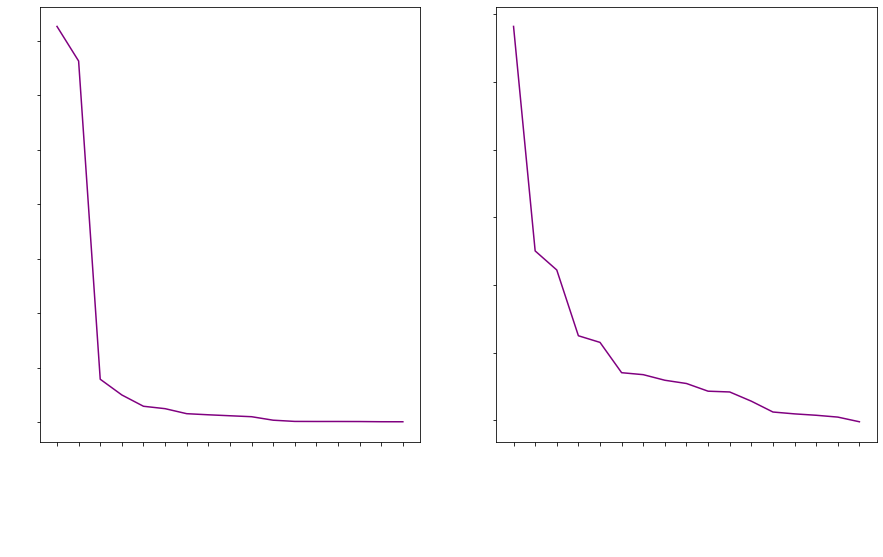

In [17]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,8))

ax1.plot(growth_subset['growth (30 days)'], color='purple')
plt.xticks(rotation=70, color='white')
plt.yticks(color='white')
ax2.plot(growth_subset.sort_values(by='growth (60 days)', ascending=False)['growth (60 days)'], color='purple',)
plt.sca(ax1)
plt.yticks(color='white')
plt.xticks(rotation=70, color='white');

# Keras

In [20]:
#načítanie dát pomocou pandas knižnice
X = df.iloc[:,9:14].values #informácie o zariadení okrem cenovej skupiny[:,9:14][:,[2,4]]
y = df.iloc[:,[3,8]].values #posledný stĺpec, cenová skupina
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 
X = sc.fit_transform(X) #úprava údajov na štandardizovanú hodnotu.
X[:10]

array([[24.63290505, 14.74557524, 18.90570949, 23.28566648, 26.61145185],
       [10.42651179,  6.72787657,  8.93625586, 11.28050243, 13.4914168 ],
       [ 6.87356898,  5.6690399 ,  6.95616904,  9.08821542, 11.96490864],
       [ 4.71541709,  4.57780898,  4.7122918 ,  4.6324828 ,  5.53145182],
       [ 3.57303283,  6.7783462 ,  6.73453533,  4.52408353,  2.62567006],
       [ 4.32807141,  2.84373253,  2.68582568,  2.46379372,  2.1901132 ],
       [ 3.74305242,  3.68438529,  2.96302332,  3.04450317,  2.44180239],
       [ 2.16955736,  3.06218718,  4.91384233,  7.63653299,  7.27286561],
       [ 2.30949691,  2.95953549,  3.84243993,  4.11778497,  2.71459873],
       [ 1.78991649,  1.26018842,  1.96498742,  2.66477345,  2.75114545]])

In [21]:
from sklearn.preprocessing import OneHotEncoder 
ohe = OneHotEncoder(categories='auto') #import OHN
y = ohe.fit_transform(y).toarray() # premenenie hodnôt y z int na bool array
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [22]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1) # rozdelenie dát na train,test pre X y. test_size urcite podiel training(90%) a test (10%)

In [23]:
import keras # import neurónovej sieti Keras
from keras.models import Sequential #import sekvenčného modelu 
from keras.layers import Dense #Dense (plne prepojené) vrstvy , spája všetky input hodnoty s output hudnotamy na každej vrstve

# Neural network
model = Sequential() # sekvenčný model NS
#add 2 skryté vrstvy o 20 a 12 dimenzií Dense(20,...) a Dense(12,...)
model.add(Dense(20, input_dim=5, activation="relu")) # určuje vstupnú dimenziu 20 (dáta) a aktivačnú funkciu relu
model.add(Dense(12, activation="relu")) # podobne určuje vrstvu s 12 dimenziami, keďže ide o sekvenčný model Kerasu, automaticky ho prevezme z 1.
model.add(Dense(26, activation="softmax")) # output je nastaveny na 4, pretože cenové dĺžky sú od 1 po 4, teda 4 objekty na klasifikovanie
model.summary()
# softmax je aktivačná funkcia ktorá berie výstup poslednej vrstvy viactriednej klasifikačnej neurónovej sieti
#vezme exponenty každého výstupu a potom normalizuje každé číslo súčtom týchto exponentov, takže celý výstupný vektor sa bude rovnať 1 - všetky pravdepodobnosti by sa mali po súčte rovnať 1

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 12)                252       
_________________________________________________________________
dense_2 (Dense)              (None, 26)                338       
Total params: 710
Trainable params: 710
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#Adam je optimalizačný algoritmus, ktorý sa dá použiť na aktualizáciu iteratívnych váh v sieti na základe trénovacích dát.
#Metrics určuje na základe čoho sa bude presnosť siete merať 

In [25]:
history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=100, batch_size=2000)
# na preprivpravený model sa zavolá funkcia fit ktorá berie ako vstupné parametre dáta z datasetu, epochs = počet iterácií a batch_size kt predstavuje aké množstvo údajov sa spracováva naraz. 

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 6.6084 - accuracy: 0.0013 - val_loss: 6.7475 - val_accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 49ms/step - loss: 6.6021 - accuracy: 0.0045 - val_loss: 6.7388 - val_accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 46ms/step - loss: 6.5959 - accuracy: 0.0058 - val_loss: 6.7302 - val_accuracy: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 47ms/step - loss: 6.5897 - accuracy: 0.0071 - val_loss: 6.7217 - val_accuracy: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 46ms/step - loss: 6.5835 - accuracy: 0.0090 - val_loss: 6.7132 - val_accuracy: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 0s 45ms/step - loss: 6.5774 - accuracy: 0.0109 - val_loss: 6.7047 - val_accuracy: 0.0058
Epoch 7/100
1/1 [==============================] - 0s 46ms/step - loss: 6.5714 - accuracy: 0.0167 - val_loss: 6.6963 - val_accuracy: 0.0116
Ep

In [26]:
y_pred = model.predict(X_test)
#vygeneruje predikcie na zaklade vstupnych dat
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i])) #argmax vráti pozíciu najväčšej hodnoty (teda prekonvertuje na int z OHT)
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

In [27]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test) # porovnáva hodnoty a vyhodnotí na kolko % sa výsledky zhodujú 
print("Presnosť(%):", a*100)

Presnosť(%): 53.75722543352601


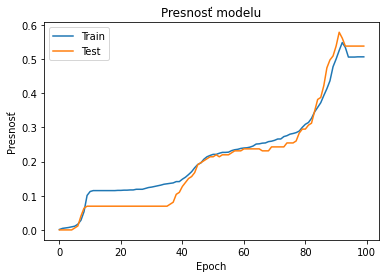

In [28]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Presnosť modelu")
plt.ylabel("Presnosť")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc="upper left")
plt.show()

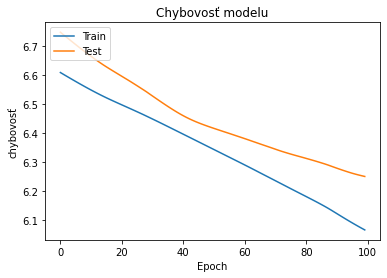

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Chybovosť modelu')
plt.ylabel('chybovosť')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()